<a href="https://colab.research.google.com/github/Cubit0-de-hielo/cubito/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install skforecast

In [ ]:
!pip install sklearn

In [ ]:
link = 'https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code= '?raw=true'
url=link+code
df= pd.read_csv(url,sep=',',index_col=1)

In [ ]:
df['Country'].isin(['Italy']).sum()

141

In [ ]:
It = df[df['Country']=='Italy']

In [ ]:
It

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
14/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
15/05/2015,Italy,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
18/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
19/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
20/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
22/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [ ]:
It = It.drop('Country',axis=1)

In [ ]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
14/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
18/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
19/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
20/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [ ]:
It.isnull().sum()

No. of confirmed cases       0
No. of confirmed deaths    140
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [ ]:
mean_values=It['No. of confirmed deaths'].mean()
mean_values

0.0

In [ ]:
It.fillna(0.0,inplace=True)

In [ ]:
It['No. of confirmed deaths'].mean()

0.0

In [ ]:
It['No. of confirmed cases'].mean()

1.0

In [ ]:
Dates=It.index[0:-1:10]
NCC=It['No. of confirmed cases'][0:-1:10]
NCD=It['No. of confirmed deaths'][0:-1:10]

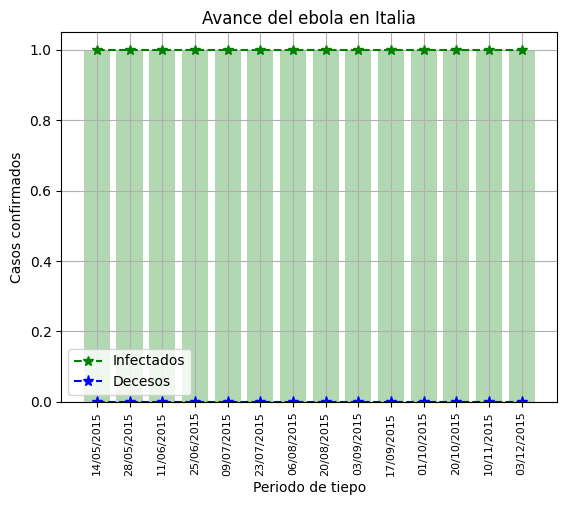

In [ ]:
plt.plot (Dates,NCC,'*--g',ms=7,label='Infectados')
plt.bar (Dates,NCC,color='green',alpha=0.3)
plt.plot (Dates,NCD,'*--b',ms=8,label='Decesos')
plt.bar (Dates,NCD,color='blue',alpha=0.3)
plt.grid()
plt.title('Avance del ebola en Italia')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiepo')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.savefig("Avance_del_ebola_en_Italia.pdf",dpi=300,format='pdf') #sirve para poder guardar la imagen pfd
plt.show()

In [ ]:
PIvsD=100*It['No. of confirmed deaths']/It['No. of confirmed cases']
It['PIvsD']=PIvsD

In [ ]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,
14/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
18/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
19/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
20/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0


In [ ]:
recuperados=((100-PIvsD)/100)*It['No. of confirmed cases']
It['recuperados']=recuperados

In [ ]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados
Date,,,,,,,,,,,,
14/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
18/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
19/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
20/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0


In [ ]:
It['PR']=(100-PIvsD)

In [ ]:
PIvsD_mean=It['PIvsD'].mean()
PR_mean=It['PR'].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=['PIvsD','PR']

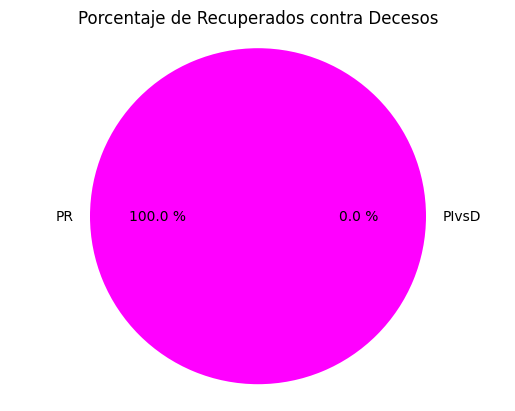

In [ ]:
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%', colors=['pink','magenta'])
plt.axis("equal")
plt.title("Porcentaje de Recuperados contra Decesos")
plt.savefig("Porcentaje_de_Recuperados_contra_Decesos.pdf",dpi=300,format='pdf')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

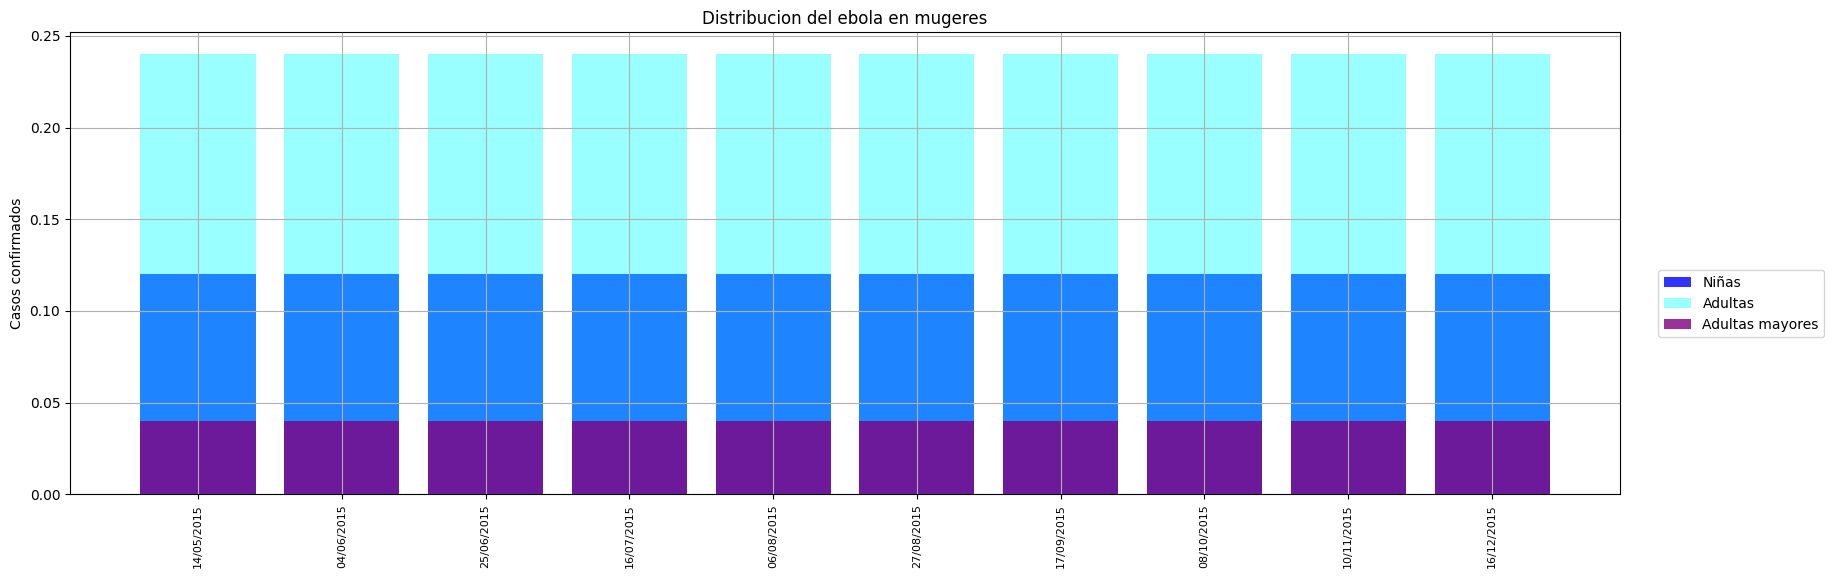

In [ ]:
G=It['Girls'][0:-1:15]
AF=It['Adult Female'][0:-1:15]
OF=It['Old Female'][0:-1:15]
Dates=It.index[0:-1:15]
fig=plt.figure(figsize=(20,6))
plt.bar(Dates,G,color='blue',alpha=0.8,label='Niñas')
plt.bar(Dates,AF,color='cyan',alpha=0.4,label='Adultas')
plt.bar(Dates,OF,color='purple',alpha=0.8,label='Adultas mayores')
plt.grid()
plt.title("Distribucion del ebola en mugeres")
plt.ylabel('Casos confirmados')
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc='upper left',bbox_to_anchor=(1.02,0.5))
plt.savefig("Distribcion_del_ebola_en_mujeres.pdf",dpi=300,format='pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

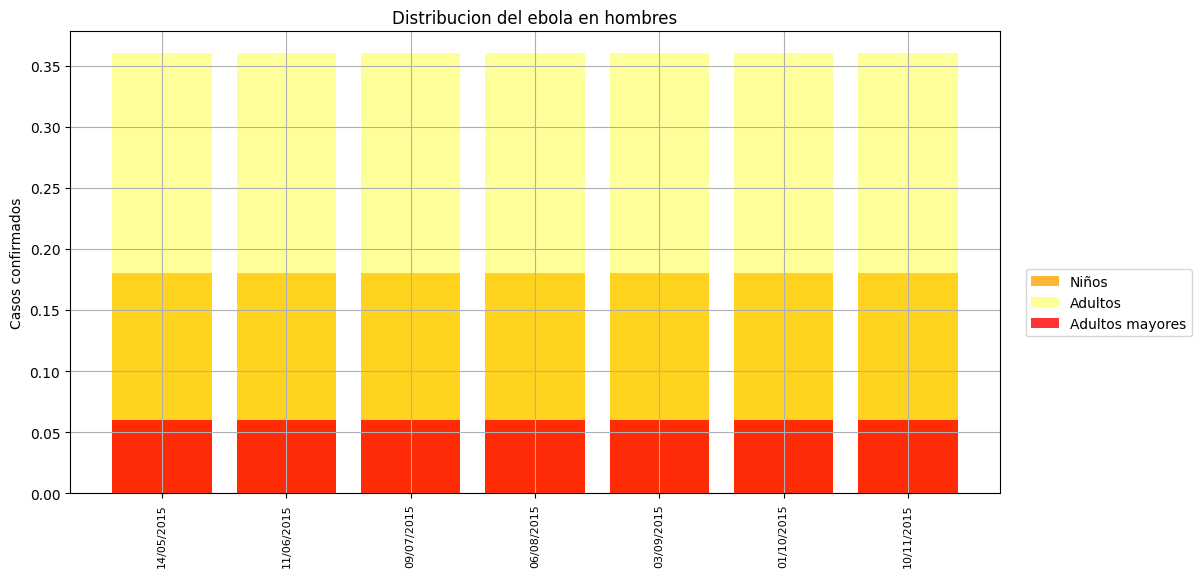

In [ ]:
G=It['Boys'][0:-1:20]
AF=It['Adult Male'][0:-1:20]
OF=It['Old Male'][0:-1:20]
Dates=It.index[0:-1:20]
fig=plt.figure(figsize=(12,6))
plt.bar(Dates,G,color='orange',alpha=0.8,label='Niños')
plt.bar(Dates,AF,color='yellow',alpha=0.4,label='Adultos')
plt.bar(Dates,OF,color='red',alpha=0.8,label='Adultos mayores')
plt.grid()
plt.title("Distribucion del ebola en hombres")
plt.ylabel('Casos confirmados')
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc='upper left',bbox_to_anchor=(1.02,0.5))
plt.savefig("Distribcion_del_ebola_en_hombres.pdf",dpi=300,format='pdf')
plt.show

In [ ]:
Boys=It['Boys'].to_numpy()
It_Boys=pd.DataFrame({'Boys':Boys})
It_Boys.index=pd.to_datetime(It.index,format='%d/%m/%Y')
It_Boys=It_Boys.sort_index()

In [ ]:
It_Boys

,Boys
Date,
2015-05-14,0.18
2015-05-15,0.18
2015-05-18,0.18
2015-05-19,0.18
2015-05-20,0.18
...,...
2015-12-17,0.18
2015-12-22,0.18
2015-12-23,0.18


In [ ]:
steps=57

data_train=It_Boys[:-steps]
data_test=It_Boys[-steps:]

In [ ]:
forecaster=ForecasterAutoreg(
  regressor=RandomForestRegressor(random_state=123),
  lags=6
)

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forecaster.fit(y=data_train['Boys'])

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
steps=57
predicciones=forecaster.predict(steps=steps)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
predicciones.index=data_test.index

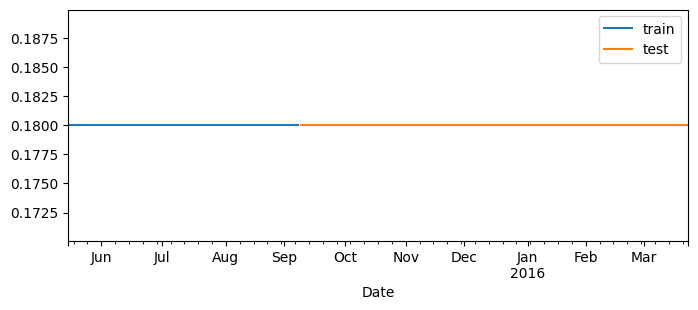

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
data_train['Boys'].plot(ax=ax,label='train')
data_test['Boys'].plot(ax=ax,label='test')
ax.legend()
plt.show()

In [ ]:
steps=57
predicciones=forecaster.predict(steps=steps)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


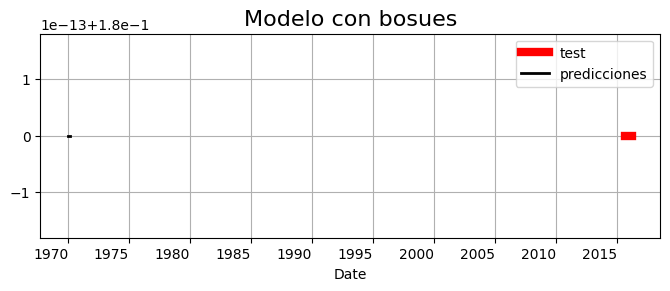

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
#data_train['Boys'].plot(ax=ax,label='train')
data_test['Boys'].plot(ax=ax,label='test',lw=6,color='red')
predicciones.plot(ax=ax,label='predicciones',lw=2,color='black')
ax.legend()
plt.grid()
plt.title("Modelo con bosues",fontsize=16)
plt.show()